<a href="https://colab.research.google.com/github/sahil-kothari/ML/blob/main/Clustering(Hitters).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df = pd.read_csv('/content/Hitters.csv')

In [ ]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
mean = df['Salary'].mean()
df['Salary'].fillna(value = mean, inplace =True)

In [ ]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [ ]:
df['League']= df['League'].factorize()[0]
df['Division']= df['Division'].factorize()[0]
df['NewLeague']= df['NewLeague'].factorize()[0]

In [ ]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League         int64
Division       int64
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague      int64
dtype: object

In [ ]:
df['Salary']=df['Salary'].astype(int)

In [ ]:
df.dtypes


AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       int64
Division     int64
PutOuts      int64
Assists      int64
Errors       int64
Salary       int64
NewLeague    int64
dtype: object

In [ ]:
X = df.iloc[:, [10, 11]].values
print(X)

[[  30   29]
 [ 321  414]
 [ 224  266]
 [ 828  838]
 [  48   46]
 [ 501  336]
 [  30    9]
 [  41   37]
 [  32   34]
 [ 784  890]
 [ 702  504]
 [ 192  186]
 [ 205  204]
 [ 309  103]
 [ 376  290]
 [  20   16]
 [1045  993]
 [  65   23]
 [ 643  658]
 [  67   82]
 [  72   48]
 [  55   43]
 [   9    9]
 [ 242  251]
 [1008 1072]
 [ 442  198]
 [ 291  108]
 [ 246  327]
 [ 349  182]
 [ 763  734]
 [1033  864]
 [  80   46]
 [ 545  652]
 [ 219  208]
 [ 126  132]
 [ 859  803]
 [ 156   86]
 [  34   29]
 [ 784  901]
 [  34   12]
 [  20   29]
 [ 796  627]
 [ 371  230]
 [  86   76]
 [ 486  493]
 [ 108  117]
 [ 113  121]
 [ 117  107]
 [ 987 1089]
 [ 352  342]
 [1003  977]
 [  32   32]
 [   3    4]
 [ 634  563]
 [ 747  666]
 [  99  138]
 [ 164  179]
 [ 441  401]
 [ 409  321]
 [ 529  472]
 [  58   69]
 [ 698  661]
 [ 116   64]
 [ 118   69]
 [  20   12]
 [1141 1179]
 [  61   74]
 [  57   40]
 [  99  103]
 [ 612  344]
 [ 950  909]
 [  33   32]
 [ 712  815]
 [1175 1152]
 [1082  949]
 [ 461  301]
 [ 196  110]

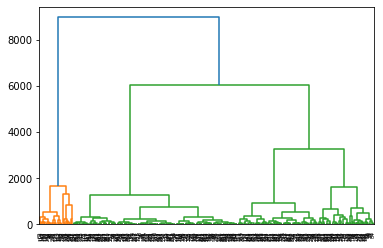

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 1, 2, 2, 2,
       2, 3, 0, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2,
       1, 2, 2, 2, 0, 3, 0, 2, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2,
       1, 2, 2, 3, 2, 2, 2, 3, 0, 1, 2, 3, 0, 2, 2, 3, 0, 2, 2, 1, 3, 2,
       0, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 0, 2, 2, 1, 1, 3, 3, 3, 1, 3, 2,
       0, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 0, 1, 3, 3, 3, 3, 1, 2, 2, 2, 3,
       3, 2, 1, 2, 1, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2,
       2, 3, 1, 0, 3, 1, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 3, 0, 2, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 3, 1, 0, 2, 3, 3, 2, 3, 2, 1, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 1, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3,

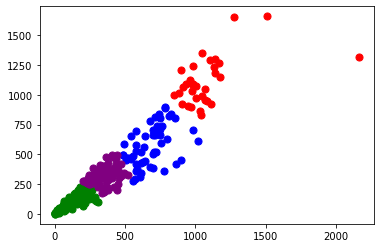

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

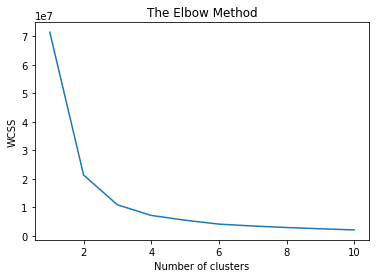

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

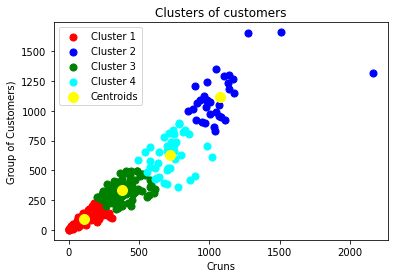

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Cruns')
plt.ylabel('Group of Customers)')
plt.legend()
plt.show()